In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [18]:
from random import uniform as rand

def gaussian(x, mu = 0, sigma = 1):
    return math.exp(-0.5*((x-mu)/sigma)**2) / sigma / math.sqrt(2*math.pi)

def rand_equal_sum(n, M):
     splits = [0] + [rand(0, 1) for _ in range(0,n-1)] + [1]
     splits.sort()
     diffs = [x - splits[i - 1] for i, x in enumerate(splits)][1:]
     result = list(map(lambda x:x*M, diffs))
     return result
res = rand_equal_sum(10,10)
print(res)
print(sum(res))

[1.8903123360218033, 0.7714153389490319, 1.023713464330387, 0.7790276519367734, 0.501254759337949, 0.616650234367695, 1.0545518668435838, 0.8318568534253501, 0.6799662209513702, 1.8512512738360565]
10.0


1.8512512738360565


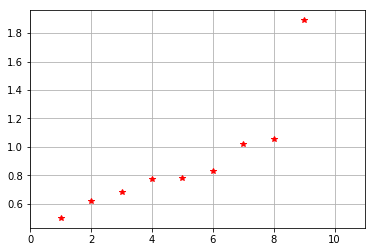

In [19]:
dif = res.pop()
res.sort()
print(dif)
x = np.linspace(1, len(res), len(res))
p = plt.plot(x, [r for r in res],'r*')
plt.xlim(0,11)
plt.grid()
plt.legend()
plt.show()

In [20]:
def rep_distribution(res, dif, n):
    xs = np.linspace(-2, 2, n)
    gausValues = []
    for x in xs:
        gausValues.append(gaussian(x))
    gains = []
    for g in gausValues:
        gains.append(g/sum(gausValues))
    difs = []
    for i in range(len(res)):
        difi = dif * gains[i]
        res[i] += difi
        difs.append(difi)
        if (i == len(res)- 1 - i):
            break
        res[- 1 - i] += difi 
        difs.append(difi)
    x = np.linspace(1, len(res), len(res))
    p = plt.plot(x, [g for g in gains],'r*', label='$\sigma = 1$')
    plt.legend()
    plt.xlim(0,11)
    plt.grid()
    plt.show()

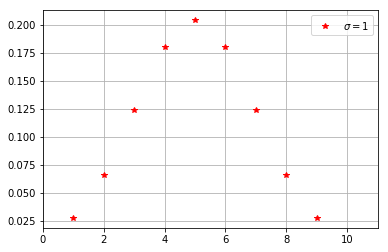

In [21]:
rep_distribution(res, dif-1, len(res))

9.0


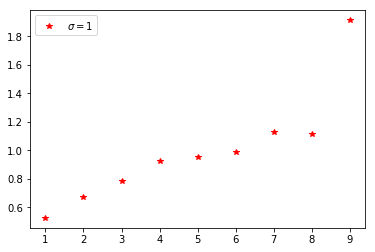

In [23]:
print(sum(res))
x = np.linspace(1, len(res), len(res))
p = plt.plot(x, [r for r in res],'r*', label='$\sigma = 1$')
plt.legend()
plt.show()